In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import time 
import scipy
import investpy
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

# Import data

In [2]:
ft = yf.download("TNPC.BK TOA.BK DRT.BK STEC.BK TPOLY.BK SI=F PL=F HG=F",start="2010-01-02",end="2020-08-31")
ft.fillna(method='bfill', inplace=True)
ft = ft.dropna()
ft = ft['Adj Close']
ft.head()

[*********************100%***********************]  8 of 8 completed


,DRT.BK,HG=F,PL=F,SI=F,STEC.BK,TNPC.BK,TOA.BK,TPOLY.BK
Date,,,,,,,,
2010-01-04,1.595847,3.3880,1517.300049,17.440001,3.966286,0.380774,31.100529,1.490231
2010-01-05,1.595847,3.3960,1530.800049,17.781000,3.904311,0.380774,31.100529,1.504159
2010-01-06,1.595847,3.4775,1552.199951,18.163000,3.873323,0.380774,31.100529,1.518086
2010-01-07,1.595847,3.4115,1553.000000,18.333000,3.904311,0.380774,31.100529,1.518086
2010-01-08,1.595847,3.3880,1564.599976,18.458000,3.873323,0.380774,31.100529,1.518086


In [3]:
st = yf.download("PTTEP.BK TVO.BK CPF.BK SCC.BK TNPC.BK",start="2010-01-02",end="2020-08-31")
st.fillna(method='bfill', inplace=True)
st = st.dropna()
st = st['Adj Close']
st.head()

[*********************100%***********************]  5 of 5 completed


,CPF.BK,PTTEP.BK,SCC.BK,TNPC.BK,TVO.BK
Date,,,,,
2010-01-04,7.740198,91.686096,159.190170,0.380774,8.899861
2010-01-05,7.603206,92.628090,159.190170,0.380774,8.899861
2010-01-06,7.740198,93.570053,157.140518,0.380774,8.949582
2010-01-07,7.740198,92.628090,154.407623,0.380774,8.999301
2010-01-08,8.014190,93.256287,155.090866,0.380774,9.049023


In [4]:
PTT = ft.join(st['SCC.BK'])
PTT = PTT.dropna()
PTT

,DRT.BK,HG=F,PL=F,SI=F,STEC.BK,TNPC.BK,TOA.BK,TPOLY.BK,SCC.BK
Date,,,,,,,,,
2010-01-04,1.595847,3.3880,1517.300049,17.440001,3.966286,0.380774,31.100529,1.490231,159.190170
2010-01-05,1.595847,3.3960,1530.800049,17.781000,3.904311,0.380774,31.100529,1.504159,159.190170
2010-01-06,1.595847,3.4775,1552.199951,18.163000,3.873323,0.380774,31.100529,1.518086,157.140518
2010-01-07,1.595847,3.4115,1553.000000,18.333000,3.904311,0.380774,31.100529,1.518086,154.407623
2010-01-08,1.595847,3.3880,1564.599976,18.458000,3.873323,0.380774,31.100529,1.518086,155.090866
...,...,...,...,...,...,...,...,...,...
2020-08-24,6.163235,2.9225,920.799988,26.587999,13.000000,0.700000,39.478291,1.850000,361.000000
2020-08-25,6.211765,2.9310,930.599976,26.254000,13.000000,0.700000,39.230000,1.900000,356.000000
2020-08-26,6.308824,2.9595,936.400024,27.430000,13.200000,0.710000,39.230000,1.940000,351.000000


In [5]:
# df = pd.read_csv('BZ=F.csv')
# df = df.rename(columns={'วันเดือนปี' : 'Date','ล่าสุด' : 'BZ=F'})
# df = df[['BZ=F']]

# PTT = PTT.merge(df)
# PTT

# Visualize the Time Series

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


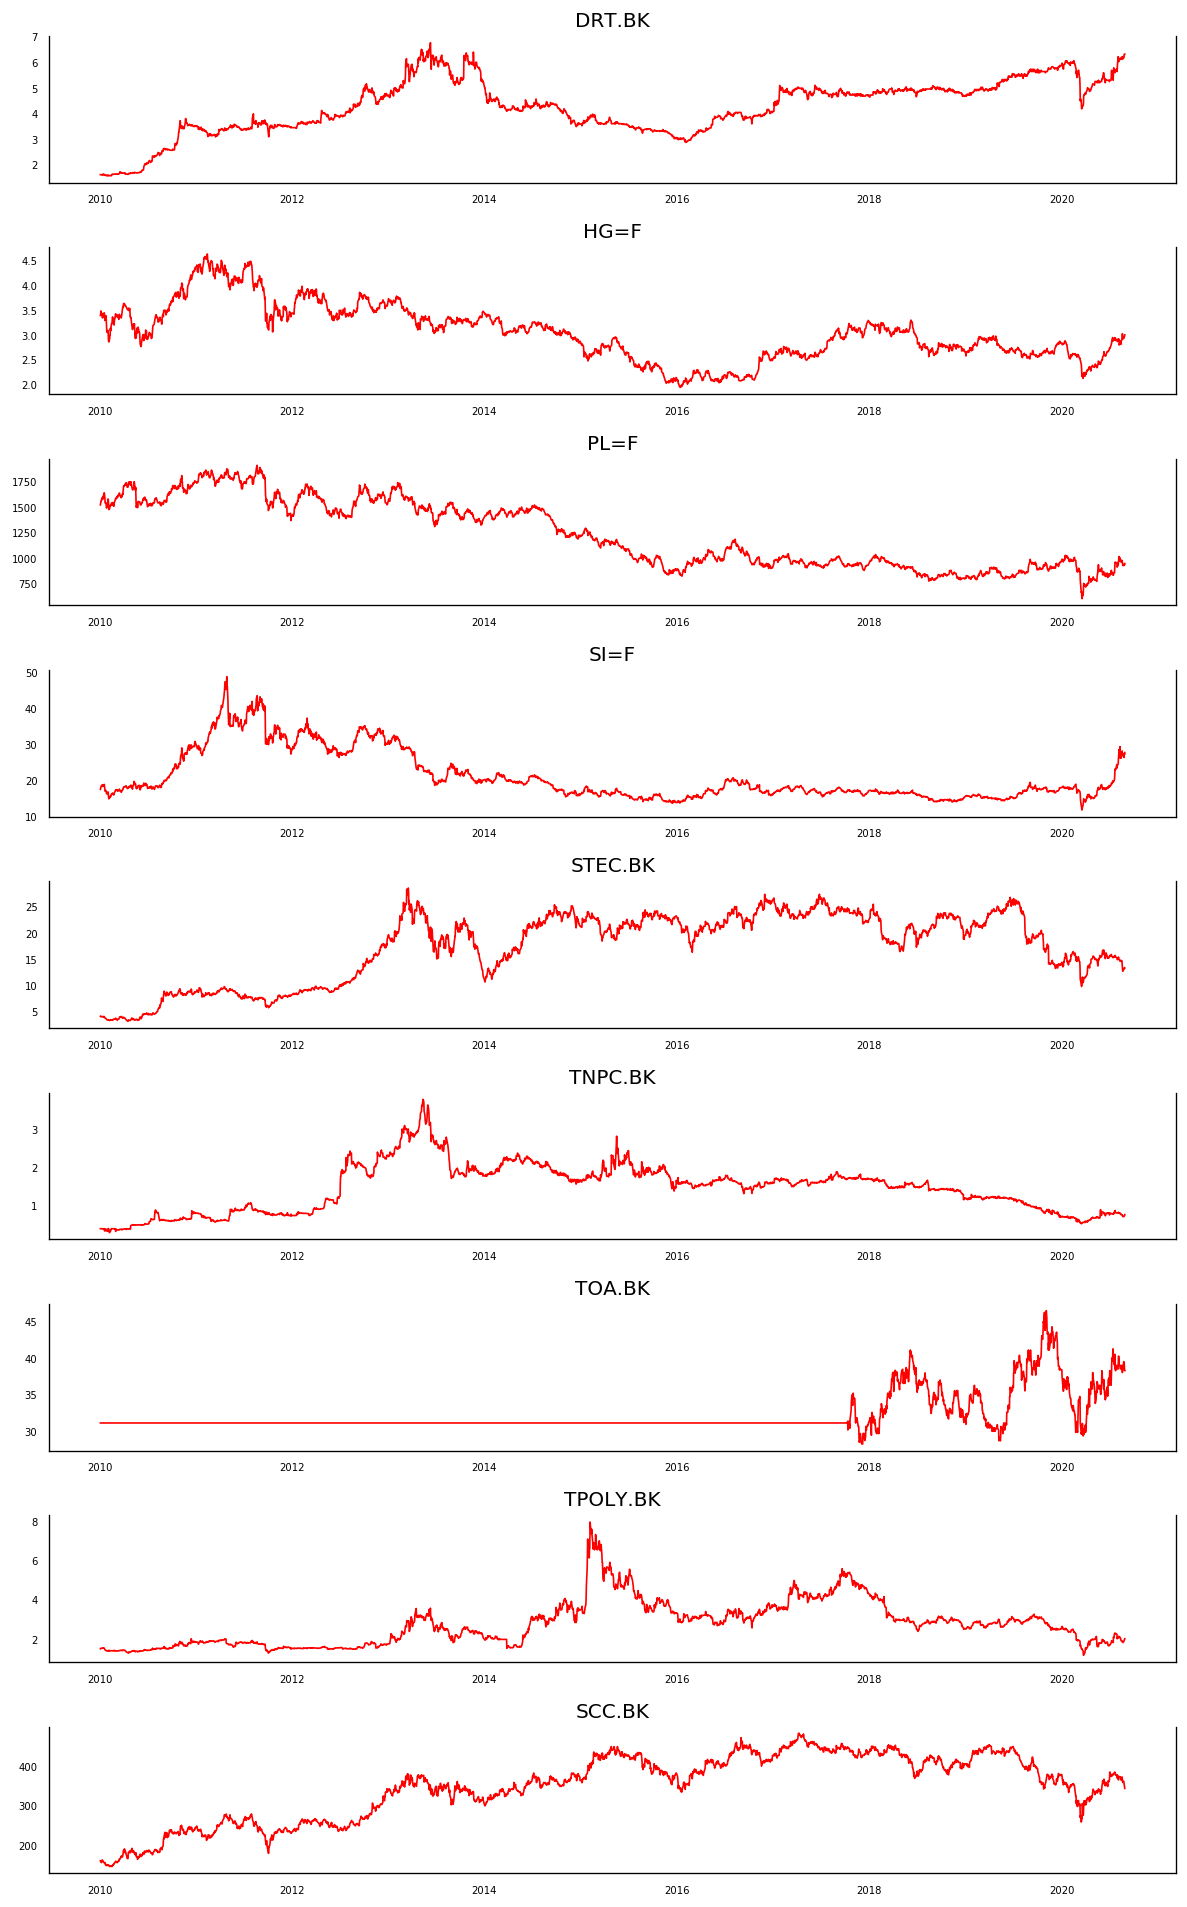

In [6]:
fig, axes = plt.subplots(nrows=len(PTT.columns), ncols=1, dpi=120, figsize=(10,16))
for i, ax in enumerate(axes.flatten()):
    data = PTT[PTT.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(PTT.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Correlation

In [7]:
PTT.corr()

,DRT.BK,HG=F,PL=F,SI=F,STEC.BK,TNPC.BK,TOA.BK,TPOLY.BK,SCC.BK
DRT.BK,1.000000,-0.151228,-0.403443,-0.125939,0.524000,0.405580,0.444869,0.190304,0.547293
HG=F,-0.151228,1.000000,0.833349,0.802672,-0.605535,-0.160654,-0.205030,-0.496502,-0.637288
PL=F,-0.403443,0.833349,1.000000,0.790885,-0.667546,-0.063729,-0.433039,-0.540838,-0.780011
SI=F,-0.125939,0.802672,0.790885,1.000000,-0.556628,-0.127520,-0.218164,-0.523602,-0.581212
STEC.BK,0.524000,-0.605535,-0.667546,-0.556628,1.000000,0.630878,0.068812,0.738825,0.916017
TNPC.BK,0.405580,-0.160654,-0.063729,-0.127520,0.630878,1.000000,-0.252157,0.426606,0.476079
TOA.BK,0.444869,-0.205030,-0.433039,-0.218164,0.068812,-0.252157,1.000000,-0.028752,0.214970
TPOLY.BK,0.190304,-0.496502,-0.540838,-0.523602,0.738825,0.426606,-0.028752,1.000000,0.767463
SCC.BK,0.547293,-0.637288,-0.780011,-0.581212,0.916017,0.476079,0.214970,0.767463,1.000000


# Testing Causation using Granger’s Causality Test

In [8]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=24
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    PTT = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in PTT.columns:
        for r in PTT.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            PTT.loc[r, c] = min_p_value
    PTT.columns = [var + '_x' for var in variables]
    PTT.index = [var + '_y' for var in variables]
    return PTT

grangers_causation_matrix(PTT, variables = PTT.columns)   

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 4, bu

,DRT.BK_x,HG=F_x,PL=F_x,SI=F_x,STEC.BK_x,TNPC.BK_x,TOA.BK_x,TPOLY.BK_x,SCC.BK_x
DRT.BK_y,1.0000,0.0219,0.0815,0.0394,0.0001,0.1585,0.0286,0.0016,0.0004
HG=F_y,0.2581,1.0000,0.3871,0.0002,0.0232,0.1628,0.4601,0.1550,0.0198
PL=F_y,0.0044,0.0023,1.0000,0.0554,0.0172,0.3365,0.1093,0.0100,0.0005
SI=F_y,0.0746,0.0000,0.0583,1.0000,0.0044,0.0237,0.1114,0.0102,0.0084
STEC.BK_y,0.0005,0.2858,0.1626,0.2035,1.0000,0.0592,0.0012,0.1191,0.0256
TNPC.BK_y,0.1265,0.1067,0.2874,0.0826,0.0016,1.0000,0.1753,0.0437,0.0143
TOA.BK_y,0.0220,0.2074,0.0135,0.2194,0.0172,0.3046,1.0000,0.8196,0.0324
TPOLY.BK_y,0.2170,0.2949,0.1879,0.2550,0.0003,0.0087,0.2005,1.0000,0.0389
SCC.BK_y,0.0048,0.0001,0.0004,0.0069,0.0079,0.0635,0.0135,0.0759,1.0000


# Cointegration Test

In [9]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(PTT, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(PTT,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(PTT.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(PTT)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
DRT.BK ::  166.52    > 179.5199  =>   False
HG=F   ::  109.96    > 143.6691  =>   False
PL=F   ::  79.48     > 111.7797  =>   False
SI=F   ::  49.75     > 83.9383   =>   False
STEC.BK ::  32.8      > 60.0627   =>   False
TNPC.BK ::  19.76     > 40.1749   =>   False
TOA.BK ::  9.36      > 24.2761   =>   False
TPOLY.BK ::  3.07      > 12.3212   =>   False
SCC.BK ::  0.09      > 4.1296    =>   False


# Split the Series into Training and Testing Data

In [10]:
nobs = 7
ft_train, ft_test = PTT[0:-nobs], PTT[-nobs:]

# Check size
print(ft_train.shape)  
print(ft_test.shape)  
ft_train

(2596, 9)
(7, 9)


,DRT.BK,HG=F,PL=F,SI=F,STEC.BK,TNPC.BK,TOA.BK,TPOLY.BK,SCC.BK
Date,,,,,,,,,
2010-01-04,1.595847,3.3880,1517.300049,17.440001,3.966286,0.380774,31.100529,1.490231,159.190170
2010-01-05,1.595847,3.3960,1530.800049,17.781000,3.904311,0.380774,31.100529,1.504159,159.190170
2010-01-06,1.595847,3.4775,1552.199951,18.163000,3.873323,0.380774,31.100529,1.518086,157.140518
2010-01-07,1.595847,3.4115,1553.000000,18.333000,3.904311,0.380774,31.100529,1.518086,154.407623
2010-01-08,1.595847,3.3880,1564.599976,18.458000,3.873323,0.380774,31.100529,1.518086,155.090866
...,...,...,...,...,...,...,...,...,...
2020-08-13,6.114706,2.8040,978.099976,27.694000,14.700000,0.760000,38.485126,1.940000,371.000000
2020-08-14,6.114706,2.8560,954.400024,26.065001,14.500000,0.750000,38.733418,1.900000,364.000000
2020-08-17,6.114706,2.8980,963.299988,27.643000,14.600000,0.750000,38.981709,1.900000,368.000000


# Check for Stationarity and Make the Time Series Stationary

In [11]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [12]:
# ADF Test on each column
for name, column in ft_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "DRT.BK" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.1857
 No. Lags Chosen       = 20
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.2115. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "HG=F" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.7369
 No. Lags Chosen       = 21
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.4122. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "PL=F" 
    -----------------------------------------------
 Null Hypothesis: Data has uni

In [13]:
# 1st difference
ft_differenced = ft_train.diff().dropna()

In [14]:
# ADF Test on each column of 1st Differences Dataframe
for name, column in ft_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "DRT.BK" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -10.4732
 No. Lags Chosen       = 19
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "HG=F" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.0011
 No. Lags Chosen       = 20
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PL=F" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    =

In [15]:
# Second Differencing
ft_differenced = ft_differenced.diff().dropna()

In [16]:
# ADF Test on each column of 2nd Differences Dataframe
for name, column in ft_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "DRT.BK" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -15.4797
 No. Lags Chosen       = 28
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "HG=F" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -16.3722
 No. Lags Chosen       = 28
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "PL=F" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    =

# Select the Order (P) of VAR model

In [17]:
model = VAR(ft_differenced)
for i in list(range(1,24)):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -15.966987651720851
BIC :  -15.763574088011449
FPE :  1.1631226679052308e-07
HQIC:  -15.893275866102126 

Lag Order = 2
AIC :  -16.88237397277398
BIC :  -16.495764541899078
FPE :  4.656709740518658e-08
HQIC:  -16.742274022377725 

Lag Order = 3
AIC :  -17.48933868643808
BIC :  -16.919416110790976
FPE :  2.537932137250841e-08
HQIC:  -17.28280546663483 

Lag Order = 4
AIC :  -17.9197462547522
BIC :  -17.166393134863025
FPE :  1.6502915743924578e-08
HQIC:  -17.64673461267765 

Lag Order = 5
AIC :  -18.09911518327594
BIC :  -17.162213997637803
FPE :  1.3793318571295511e-08
HQIC:  -17.75957991776087 

Lag Order = 6
AIC :  -18.259850543029994
BIC :  -17.13928364792478
FPE :  1.174553184138354e-08
HQIC:  -17.853746404530035 

Lag Order = 7
AIC :  -18.395808107634892
BIC :  -17.091457736958763
FPE :  1.0252777124522794e-08
HQIC:  -17.923089798160156 

Lag Order = 8
AIC :  -18.5246414585276
BIC :  -17.036389723616157
FPE :  9.013824118684116e-09
HQIC:  -17.985263631572202 


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


 9
AIC :  -18.586846131912555
BIC :  -16.914575021365714
FPE :  8.470684664325451e-09
HQIC:  -17.98076339238401 

Lag Order = 10
AIC :  -18.64479758541527
BIC :  -16.788388964921793
FPE :  7.994313728354843e-09
HQIC:  -17.97196448956373 

Lag Order = 11
AIC :  -18.69524648487045
BIC :  -16.654582097032176
FPE :  7.60166897255102e-09
HQIC:  -17.955617540217837 

Lag Order = 12
AIC :  -18.715026949411808
BIC :  -16.489988413567552
FPE :  7.453552551756509e-09
HQIC:  -17.908556614680805 

Lag Order = 13
AIC :  -18.749329452914065
BIC :  -16.339798264963207
FPE :  7.203092674528654e-09
HQIC:  -17.87597213795699 

Lag Order = 14
AIC :  -18.747815710914782
BIC :  -16.153673243140517
FPE :  7.215033408270455e-09
HQIC:  -17.807525776642294 

Lag Order = 15
AIC :  -18.758862767263498
BIC :  -15.979990268155795
FPE :  7.136942057956502e-09
HQIC:  -17.751594525573225 

Lag Order = 16
AIC :  -18.750476351275164
BIC :  -15.786754945353376
FPE :  7.198402393738289e-09
HQIC:  -17.676184064980166 

La

In [18]:
#Lag Order = 3
x = model.select_order(maxlags=4)
x.summary()

,AIC,BIC,FPE,HQIC
0,-13.22,-13.20,1.806e-06,-13.22
1,-15.96,-15.76,1.171e-07,-15.89
2,-16.88,-16.49,4.681e-08,-16.74
3,-17.49,-16.92,2.544e-08,-17.28
4,-17.92*,-17.17*,1.650e-08*,-17.65*


# Train the VAR Model of Selected Order(p)

In [19]:
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 30, Oct, 2020
Time:                     08:59:38
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                   -16.4958
Nobs:                     2592.00    HQIC:                  -16.7423
Log likelihood:          -11050.4    FPE:                4.65671e-08
AIC:                     -16.8824    Det(Omega_mle):     4.36046e-08
--------------------------------------------------------------------
Results for equation DRT.BK
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const              -0.000010         0.001562           -0.006           0.995
L1.DRT.BK          -0.680154         0.019187          -35.448           0.000
L1.HG=F             0.067260         0.033494            2.008     

# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

In [20]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(PTT.columns, out):
    print( col,':', round(val, 2))

DRT.BK : 2.16
HG=F : 2.15
PL=F : 2.13
SI=F : 2.16
STEC.BK : 2.17
TNPC.BK : 2.13
TOA.BK : 2.2
TPOLY.BK : 2.12
SCC.BK : 2.19


# Forecast VAR model using statsmodels

In [21]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = ft_differenced.values[-lag_order:]
forecast_input

2


array([[ 9.70587730e-02,  3.09998989e-02, -1.09997559e+00,
        -1.17199898e+00, -8.00001144e-01, -9.99999046e-03,
        -7.44873047e-01, -9.99999046e-03,  0.00000000e+00],
       [-1.94117546e-01, -2.49998569e-02, -2.68999634e+01,
        -1.13999939e+00, -1.99998856e-01,  9.99999046e-03,
         0.00000000e+00, -4.99999523e-02, -1.20000000e+01]])

In [22]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
ft_forecast = pd.DataFrame(fc, index=PTT.index[-nobs:], columns=PTT.columns + '_2d')
ft_forecast


,DRT.BK_2d,HG=F_2d,PL=F_2d,SI=F_2d,STEC.BK_2d,TNPC.BK_2d,TOA.BK_2d,TPOLY.BK_2d,SCC.BK_2d
Date,,,,,,,,,
2020-08-20,0.094244,0.003103,15.595573,1.122331,0.359985,-0.016400,0.279068,0.017753,7.209079
2020-08-21,-0.001205,0.010158,-1.735133,-0.415432,-0.212625,0.005886,-0.184703,0.008279,-0.898013
2020-08-24,-0.027933,-0.008742,-2.971649,-0.051525,0.060540,0.006269,0.025986,-0.008384,-1.396042
2020-08-25,0.017997,0.001680,1.871468,0.153166,0.015130,-0.009141,0.043608,0.000190,0.965302
2020-08-26,-0.002639,0.002686,-0.147892,-0.086007,-0.032491,0.004938,-0.037245,0.003282,-0.144674
2020-08-27,-0.004068,-0.002544,-0.403379,0.013591,0.021533,-0.000150,0.010818,-0.001988,-0.149354
2020-08-28,0.003422,0.000688,0.175708,0.013948,-0.007188,-0.001896,0.003604,-0.000141,0.080903


# Invert the transformation to get the real forecast

In [23]:
def invert_transformation(ft_train, ft_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    ft_fc = ft_forecast.copy()
    columns = ft_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            ft_fc[str(col)+'_1d'] = (ft_train[col].iloc[-1]-ft_train[col].iloc[-2]) + ft_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        ft_fc[str(col)+'_forecast'] = ft_train[col].iloc[-1] + ft_fc[str(col)+'_1d'].cumsum()
    return ft_fc

In [24]:
ft_results = invert_transformation(ft_train, ft_forecast, second_diff=True)        
ft_results.loc[:, ["SCC.BK_forecast" ]]

,SCC.BK_forecast
Date,
2020-08-20,363.209079
2020-08-21,361.520145
2020-08-24,358.435169
2020-08-25,356.315495
2020-08-26,354.051147
2020-08-27,351.637445
2020-08-28,349.304646


# Evaluate the Forecasts && Plot of Forecast vs Actuals

Forecast Accuracy of: SCC
mape (Mean absolute percentage error) :  0.9584
mae (Mean Absolute Error) :  3.3718
rmse (Root Mean Square Error) :  3.8257
mase (Mean absolute scaled error) :  0.9381


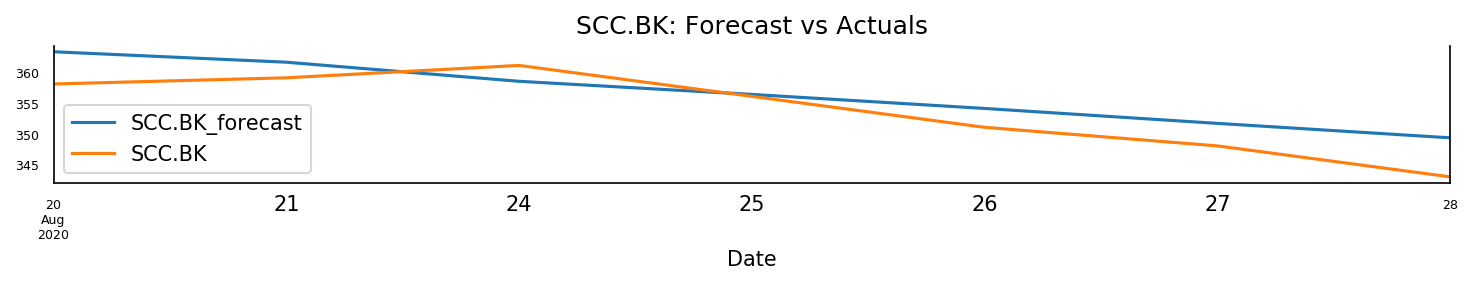

In [25]:


fig, axes = plt.subplots(nrows=1, ncols=1, dpi=150, figsize=(10,2))
# fig, axes = plt.subplots(nrows=int(len(PTT.columns)), ncols=1, dpi=150, figsize=(10,10))

# for i, (col,ax) in enumerate(zip(PTT.columns, axes.flatten())):

ft_results['SCC.BK'+'_forecast'].plot(legend=True).autoscale(axis='x',tight=True)
ft_test['SCC.BK'][-nobs:].plot(legend=True );
axes.set_title('SCC.BK' + ": Forecast vs Actuals")
axes.xaxis.set_ticks_position('none')
axes.yaxis.set_ticks_position('none')
axes.spines["top"].set_alpha(0)
axes.tick_params(labelsize=6)

from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual,train):
    
    n = train.shape[0]
    d = np.abs(  np.diff( train) ).sum()/(n-1)
    
    mase = np.mean(np.abs(actual - forecast ))/d
    
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape (Mean absolute percentage error)':mape*100,  'mae (Mean Absolute Error)': mae, 'rmse (Root Mean Square Error)':rmse, 'mase (Mean absolute scaled error)':mase })

print('Forecast Accuracy of: SCC')
accuracy_prod = forecast_accuracy(ft_results['SCC.BK_forecast'].values, ft_test['SCC.BK'],ft_train['SCC.BK'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

#     ft_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
#     ft_test[col][-nobs:].plot(legend=True, ax=ax);
#     ax.set_title(col + ": Forecast vs Actuals")
#     ax.xaxis.set_ticks_position('none')
#     ax.yaxis.set_ticks_position('none')
#     ax.spines["top"].set_alpha(0)
#     ax.tick_params(labelsize=6)

plt.tight_layout();



In [26]:
# PTT.tail()

In [29]:
ft_results.tail()

,DRT.BK_2d,HG=F_2d,PL=F_2d,SI=F_2d,STEC.BK_2d,TNPC.BK_2d,TOA.BK_2d,TPOLY.BK_2d,SCC.BK_2d,DRT.BK_1d,...,STEC.BK_1d,STEC.BK_forecast,TNPC.BK_1d,TNPC.BK_forecast,TOA.BK_1d,TOA.BK_forecast,TPOLY.BK_1d,TPOLY.BK_forecast,SCC.BK_1d,SCC.BK_forecast
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-24,-0.027933,-0.008742,-2.971649,-0.051525,0.060540,0.006269,0.025986,-0.008384,-1.396042,-0.031952,...,-0.692100,11.015245,-0.004245,0.708840,-0.376231,36.992584,-0.042352,1.711432,-3.084976,358.435169
2020-08-25,0.017997,0.001680,1.871468,0.153166,0.015130,-0.009141,0.043608,0.000190,0.965302,-0.013955,...,-0.676970,10.338275,-0.013386,0.695455,-0.332623,36.659961,-0.042162,1.669270,-2.119674,356.315495
2020-08-26,-0.002639,0.002686,-0.147892,-0.086007,-0.032491,0.004938,-0.037245,0.003282,-0.144674,-0.016594,...,-0.709462,9.628813,-0.008448,0.687006,-0.369868,36.290093,-0.038880,1.630390,-2.264348,354.051147
2020-08-27,-0.004068,-0.002544,-0.403379,0.013591,0.021533,-0.000150,0.010818,-0.001988,-0.149354,-0.020662,...,-0.687929,8.940885,-0.008598,0.678408,-0.359049,35.931044,-0.040869,1.589521,-2.413702,351.637445
2020-08-28,0.003422,0.000688,0.175708,0.013948,-0.007188,-0.001896,0.003604,-0.000141,0.080903,-0.017240,...,-0.695117,8.245767,-0.010494,0.667914,-0.355445,35.575599,-0.041009,1.548511,-2.332799,349.304646


# Evaluate the Forecasts

In [28]:
# from statsmodels.tsa.stattools import acf
# def forecast_accuracy(forecast, actual):
#     mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
#     me = np.mean(forecast - actual)             # ME
#     mae = np.mean(np.abs(forecast - actual))    # MAE
#     mpe = np.mean((forecast - actual)/actual)   # MPE
#     rmse = np.mean((forecast - actual)**2)**.5  # RMSE
#     corr = np.corrcoef(forecast, actual)[0,1]   # corr
#     mins = np.amin(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     maxs = np.amax(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     minmax = 1 - np.mean(mins/maxs)             # minmax
#     return({'mape':mape*100,  'mae': mae, 'rmse':rmse })

# print('Forecast Accuracy of: TVO')
# accuracy_prod = forecast_accuracy(ft_results['TVO.BK_forecast'].values, ft_test['TVO.BK'])
# for k, v in accuracy_prod.items():
#     print(k, ': ', round(v,4))

# # print('\nForecast Accuracy of: CC=F')
# # accuracy_prod = forecast_accuracy(ft_results['CC=F_forecast'].values, ft_test['CC=F'])
# # for k, v in accuracy_prod.items():
# #     print(k, ': ', round(v,4))

# # print('\nForecast Accuracy of: KC=F')
# # accuracy_prod = forecast_accuracy(ft_results['KC=F_forecast'].values, ft_test['KC=F'])
# # for k, v in accuracy_prod.items():
# #     print(k, ': ', round(v,4))

# # print('\nForecast Accuracy of: HG=F')
# # accuracy_prod = forecast_accuracy(ft_results['HG=F_forecast'].values, ft_test['HG=F'])
# # for k, v in accuracy_prod.items():
# #     print(k, ': ', round(v,4))

# # print('\nForecast Accuracy of: PL=F')
# # accuracy_prod = forecast_accuracy(ft_results['PL=F_forecast'].values, ft_test['PL=F'])
# # for k, v in accuracy_prod.items():
# #     print(k, ': ', round(v,4))

# # print('\nForecast Accuracy of: ALI=F')
# # accuracy_prod = forecast_accuracy(ft_results['ALI=F_forecast'].values, ft_test['ALI=F'])
# # for k, v in accuracy_prod.items():
# #     print(k, ': ', round(v,4))

# # print('\nForecast Accuracy of: SI=F')
# # accuracy_prod = forecast_accuracy(ft_results['SI=F_forecast'].values, ft_test['SI=F'])
# # for k, v in accuracy_prod.items():
# #     print(k, ': ', round(v,4))

# # print('\nForecast Accuracy of: GC=F')
# # accuracy_prod = forecast_accuracy(ft_results['GC=F_forecast'].values, ft_test['GC=F'])
# # for k, v in accuracy_prod.items():
# #     print(k, ': ', round(v,4))

# # print('\nForecast Accuracy of: NG=F')
# # accuracy_prod = forecast_accuracy(ft_results['NG=F_forecast'].values, ft_test['NG=F'])
# # for k, v in accuracy_prod.items():
# #     print(k, ': ', round(v,4))

# # print('\nForecast Accuracy of: CL=F')
# # accuracy_prod = forecast_accuracy(ft_results['CL=F_forecast'].values, ft_test['CL=F'])
# # for k, v in accuracy_prod.items():
# #     print(k, ': ', round(v,4))

# # print('\nForecast Accuracy of: AAPL')
# # accuracy_prod = forecast_accuracy(ft_results['AAPL_forecast'].values, ft_test['AAPL'])
# # for k, v in accuracy_prod.items():
# #     print(k, ': ', round(v,4))

Forecast Accuracy of: TVO


KeyError: 'TVO.BK_forecast'